In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


# F1- Beta Score

0.853413654618474
0.8585858585858585
0.8638211382113821


C:\Users\Vahid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


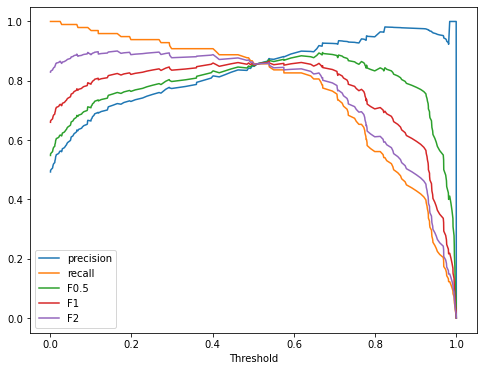

In [265]:
X, y = make_classification(n_samples=1000, n_classes=2,
                           random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=2)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1]
f1_score(y_test, y_pred)

print(fbeta_score(y_test, y_pred, beta=0.5))
print(fbeta_score(y_test, y_pred, beta=1))
print(fbeta_score(y_test, y_pred, beta=2))

_, _, threshold = precision_recall_curve(y_test, y_pred_prob)

f1score = list()
f05score = list()
f2score = list()
precision = list()
recall = list()
for th in threshold:                                                    
    y_test_pred = list()
    for prob in y_pred_prob:
        if prob > th:
            y_test_pred.append(1)
        else:
            y_test_pred.append(0)
    
    f1score.append(f1_score(y_test, y_test_pred))
    precision.append(precision_score(y_test, y_test_pred))
    recall.append(recall_score(y_test, y_test_pred))
    f05score.append(fbeta_score(y_test, y_test_pred, beta=0.5))
    f2score.append(fbeta_score(y_test, y_test_pred, beta=2))
    
_, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Threshold')
plt.plot(threshold, precision, label='precision')
plt.plot(threshold, recall, label='recall')
plt.plot(threshold, f05score, label='F0.5')
plt.plot(threshold, f1score, label='F1')
plt.plot(threshold, f2score, label='F2')
plt.legend(loc='lower left')    

In [266]:
def create_dataset(
    n_samples=1000,
    weights=(0.01, 0.01, 0.98),
    n_classes=3,
    class_sep=0.8,
    n_clusters=1,
):
    return make_classification(
        n_samples=n_samples,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_classes=n_classes,
        n_clusters_per_class=n_clusters,
        weights=list(weights),
        class_sep=class_sep,
        random_state=0,
    )
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1] [501 499]


In [267]:
sampler = RandomOverSampler(random_state=0,shrinkage=None,sampling_strategy=.5)
X_res, y_res = sampler.fit_resample(X, y)
unique, counts = np.unique(y_res, return_counts=True)
print(unique, counts)

ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.

In [ ]:
sampler = RandomUnderSampler(random_state=0,sampling_strategy=.5)
X_res, y_res = sampler.fit_resample(X, y)
unique, counts = np.unique(y_res, return_counts=True)
print(unique, counts)


In [ ]:
def plot_resampling(X, y, sampler, ax, title=None):
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.9)
    if title is None:
        title = f"Resampling with {sampler.__class__.__name__}"
    ax.set_title(title)
    sns.despine(ax=ax, offset=10)

In [ ]:
def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    if title is not None:
        ax.set_title(title)

# Illustration of the influence of the balancing ratio

In [ ]:
clf = LogisticRegression()

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

weights_arr = (
    (0.01, 0.01, 0.98),
    (0.01, 0.05, 0.94),
    (0.2, 0.1, 0.7),
    (0.33, 0.33, 0.33),
)

for ax, weights in zip(axs.ravel(), weights_arr):
    X, y = create_dataset(n_samples=300, weights=weights)
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax, title=f"weight={weights}")
    fig.suptitle(f"Decision function of {clf.__class__.__name__}")
fig.tight_layout()


With a greater imbalanced ratio, the decision function favors the class with the larger number of samples, usually referred as the majority class.

In [268]:
X, y = create_dataset(n_samples=100, weights=(0.05, 0.25, 0.7))
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)


In [269]:
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [  64  262 4674]


# Random over-sampling (bootstrap)

In [270]:
sampler = RandomOverSampler(random_state=0,shrinkage=None)
X_res, y_res = sampler.fit_resample(X, y)

unique, counts = np.unique(y_res, return_counts=True)
print(unique, counts)

[0 1 2] [4674 4674 4674]


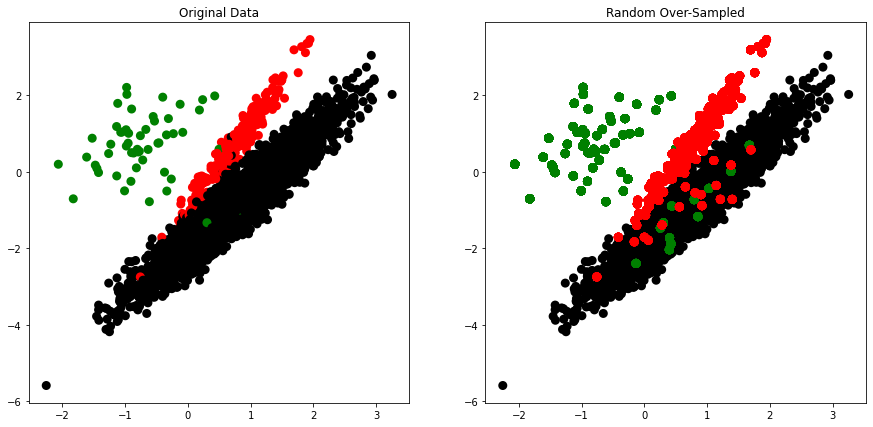

In [271]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
kwarg_params = {'linewidth': 3}
colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y]
axs[0].scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
axs[0].set_title('Original Data')

colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y_res]
axs[1].scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
axs[1].set_title('Random Over-Sampled')
plt.show()

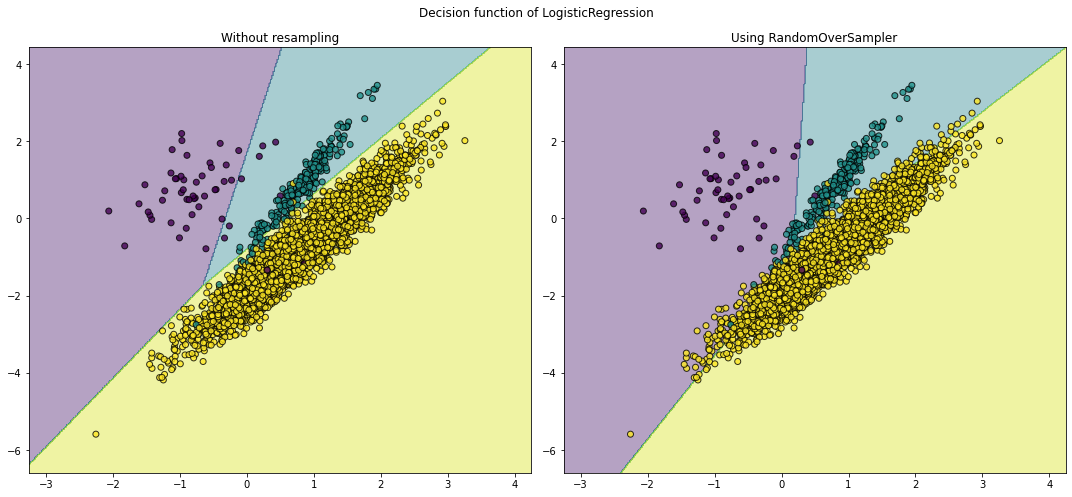

In [272]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

clf.fit(X, y)
plot_decision_function(X, y, clf, axs[0], title="Without resampling")

sampler = RandomOverSampler(random_state=0)
model = make_pipeline(sampler, clf).fit(X, y)
plot_decision_function(X, y, model, axs[1], f"Using {model[0].__class__.__name__}")

fig.suptitle(f"Decision function of {clf.__class__.__name__}")
fig.tight_layout()

# Smoothed bootstrap

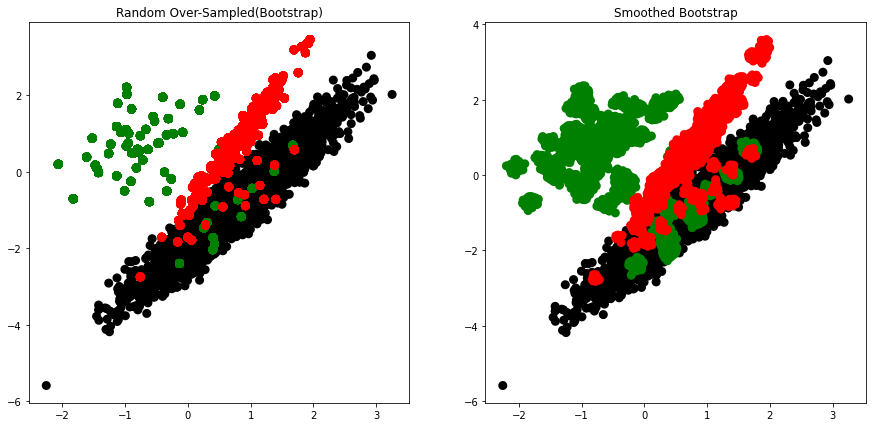

In [273]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
kwarg_params = {'linewidth': 3}

sampler = RandomOverSampler(random_state=0,shrinkage=0)
X_res, y_res = sampler.fit_resample(X, y)
colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y_res]
axs[0].scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
axs[0].set_title('Random Over-Sampled(Bootstrap)')


sampler = RandomOverSampler(random_state=0,shrinkage=.3)
X_res, y_res = sampler.fit_resample(X, y)
colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y_res]
axs[1].scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
axs[1].set_title('Smoothed Bootstrap')
plt.show()

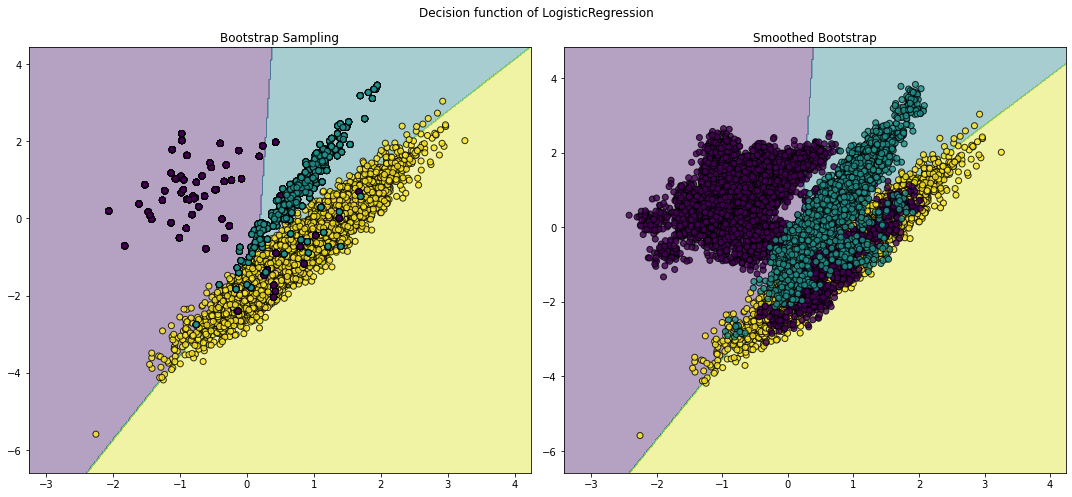

In [274]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sampler = RandomOverSampler(random_state=0,shrinkage=0)
X_res, y_res = sampler.fit_resample(X, y)
clf.fit(X_res, y_res)
plot_decision_function(X_res, y_res, clf, axs[0], title="Bootstrap Sampling")


sampler = RandomOverSampler(random_state=0,shrinkage=.8)
X_res, y_res = sampler.fit_resample(X, y)
clf.fit(X_res, y_res)
plot_decision_function(X_res, y_res, clf, axs[1], title="Smoothed Bootstrap")

fig.suptitle(f"Decision function of {clf.__class__.__name__}")
fig.tight_layout()

# SMOTE 

[0 1 2] [4674 4674 4674]


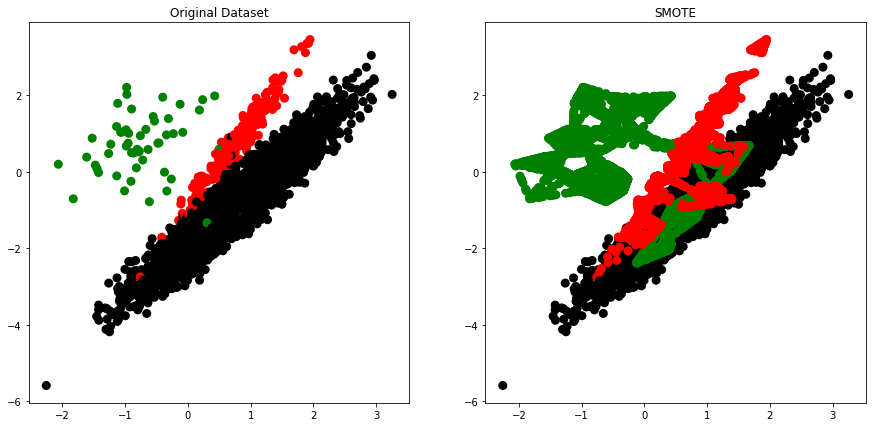

In [275]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
kwarg_params = {'linewidth': 3}

colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y]
axs[0].scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
axs[0].set_title('Original Dataset')


sampler = SMOTE(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
unique, counts = np.unique(y_res, return_counts=True)
print(unique, counts)


colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y_res]
axs[1].scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
axs[1].set_title('SMOTE')
plt.show()

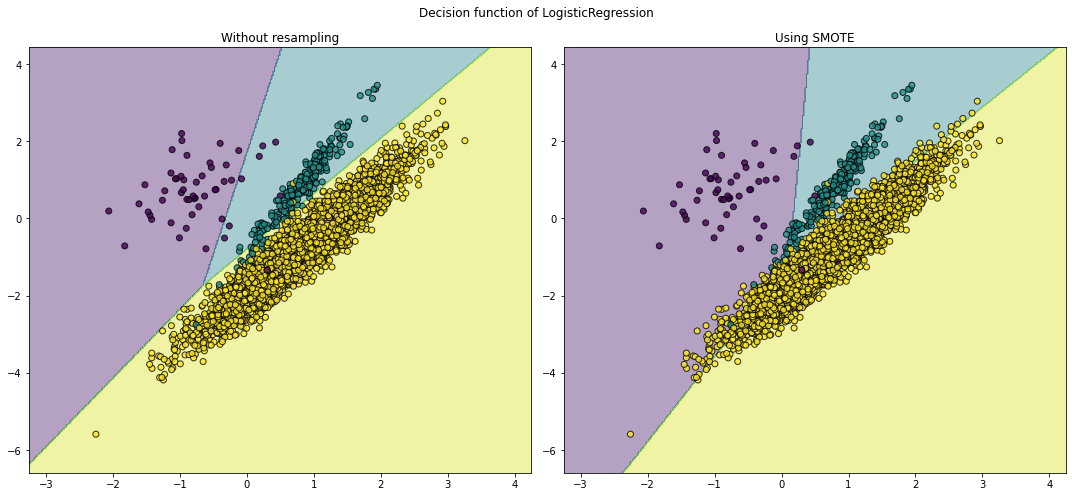

In [276]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

clf.fit(X, y)
plot_decision_function(X, y, clf, axs[0], title="Without resampling")

sampler = SMOTE(random_state=0)
model = make_pipeline(sampler, clf).fit(X, y)
plot_decision_function(X, y, model, axs[1], f"Using {model[0].__class__.__name__}")

fig.suptitle(f"Decision function of {clf.__class__.__name__}")
fig.tight_layout()

# BorderlineSMOTE

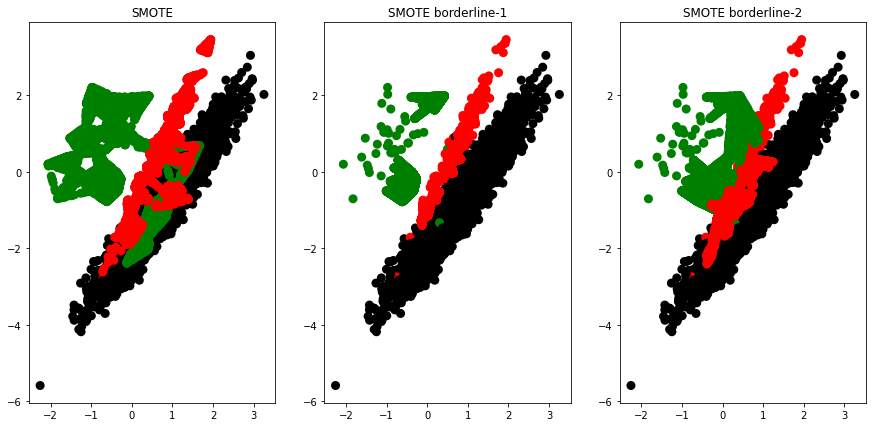

In [277]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
kwarg_params = {'linewidth': 3}

sampler = SMOTE(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y_res]
axs[0].scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
axs[0].set_title('SMOTE')

sampler = BorderlineSMOTE(random_state=0, kind="borderline-1")
X_res, y_res = sampler.fit_resample(X, y)
unique, counts = np.unique(y_res, return_counts=True)

colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y_res]
axs[1].scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
axs[1].set_title('SMOTE borderline-1')


sampler = BorderlineSMOTE(random_state=0, kind="borderline-2")
X_res, y_res = sampler.fit_resample(X, y)
unique, counts = np.unique(y_res, return_counts=True)

colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y_res]
axs[2].scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
axs[2].set_title('SMOTE borderline-2')

plt.show()

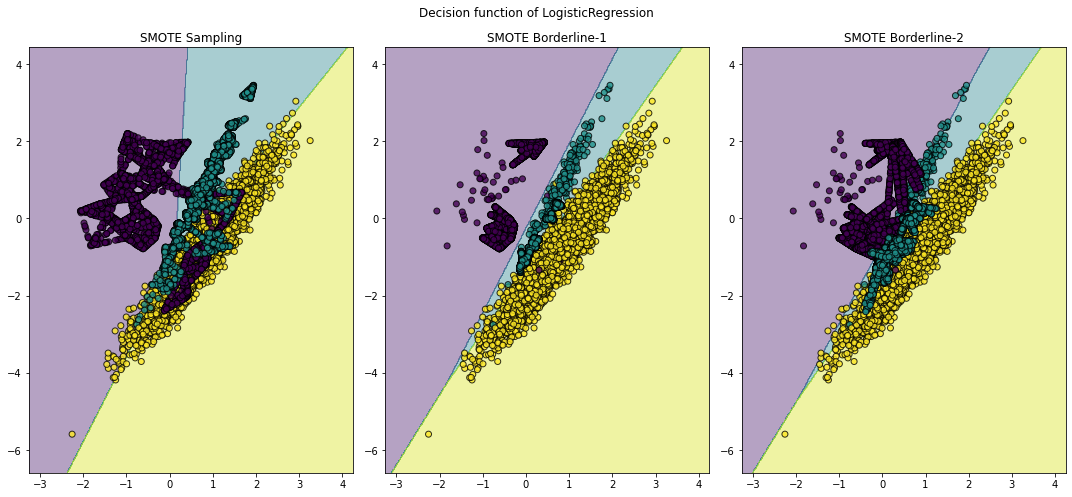

In [278]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
sampler = SMOTE(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
clf.fit(X_res, y_res)
plot_decision_function(X_res, y_res, clf, axs[0], title="SMOTE Sampling")


sampler = BorderlineSMOTE(random_state=0, kind="borderline-1")
X_res, y_res = sampler.fit_resample(X, y)
clf.fit(X_res, y_res)
plot_decision_function(X_res, y_res, clf, axs[1], title="SMOTE Borderline-1")


sampler = BorderlineSMOTE(random_state=0, kind="borderline-2")
X_res, y_res = sampler.fit_resample(X, y)
clf.fit(X_res, y_res)
plot_decision_function(X_res, y_res, clf, axs[2], title="SMOTE Borderline-2")

fig.suptitle(f"Decision function of {clf.__class__.__name__}")
fig.tight_layout()

# KMeans SMOTE

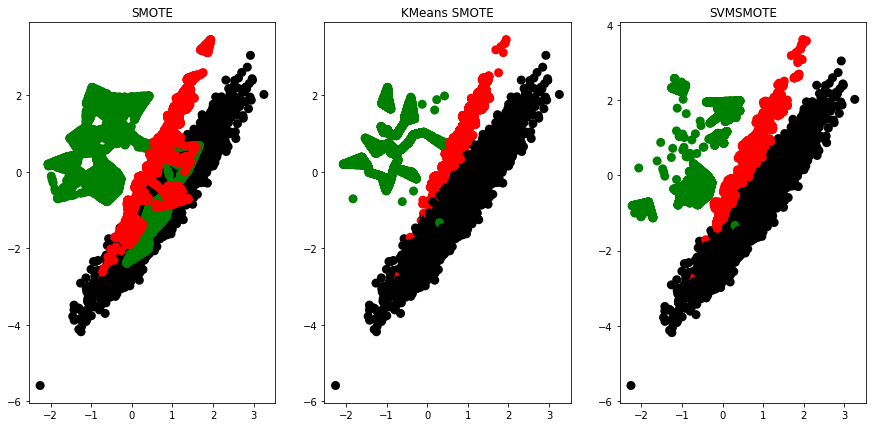

In [211]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
kwarg_params = {'linewidth': 3}

sampler = SMOTE(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y_res]
axs[0].scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
axs[0].set_title('SMOTE')

sampler = KMeansSMOTE( kmeans_estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
unique, counts = np.unique(y_res, return_counts=True)

colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y_res]
axs[1].scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
axs[1].set_title('KMeans SMOTE')


sampler = SVMSMOTE(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
unique, counts = np.unique(y_res, return_counts=True)

colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y_res]
axs[2].scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
axs[2].set_title('SVMSMOTE')

plt.show()

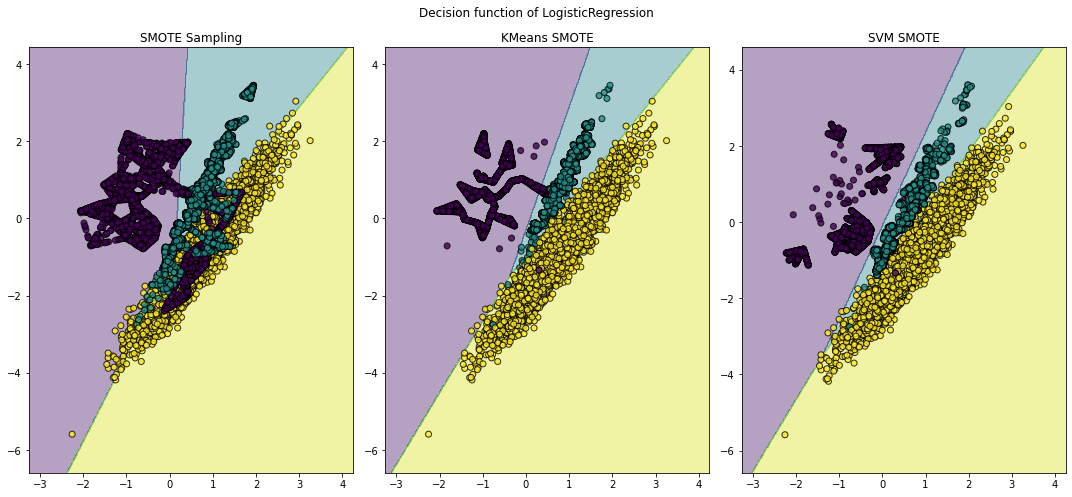

In [212]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
sampler = SMOTE(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
clf.fit(X_res, y_res)
plot_decision_function(X_res, y_res, clf, axs[0], title="SMOTE Sampling")


sampler = KMeansSMOTE( kmeans_estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
clf.fit(X_res, y_res)
plot_decision_function(X_res, y_res, clf, axs[1], title="KMeans SMOTE")


sampler = SVMSMOTE(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
clf.fit(X_res, y_res)
plot_decision_function(X_res, y_res, clf, axs[2], title="SVM SMOTE")

fig.suptitle(f"Decision function of {clf.__class__.__name__}")
fig.tight_layout()

# NearMiss

C:\Users\Vahid\anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
C:\Users\Vahid\anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


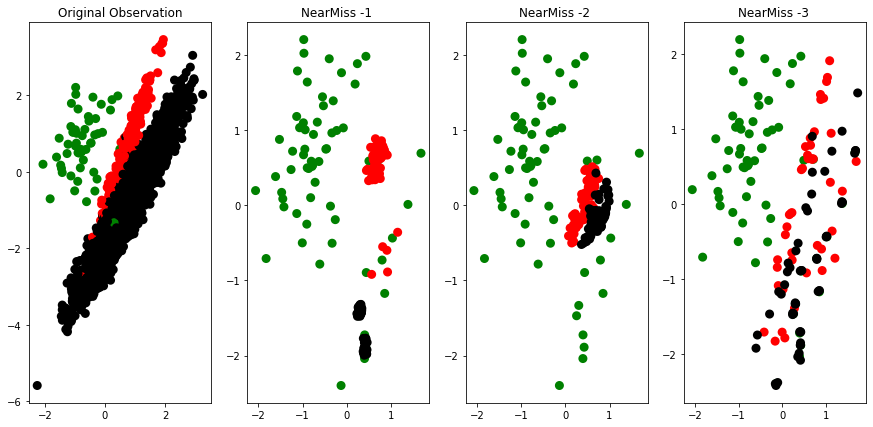

In [213]:
from imblearn.under_sampling import NearMiss

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 7))
kwarg_params = {'linewidth': 3}

colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y]
axs[0].scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
axs[0].set_title('Original Observation')


sampler = NearMiss(version=1, n_neighbors=2)
X_res, y_res = sampler.fit_resample(X, y)
colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y_res]
axs[1].scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
axs[1].set_title('NearMiss -1 ')

sampler = NearMiss(version=2, n_neighbors=2)
X_res, y_res = sampler.fit_resample(X, y)
colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y_res]
axs[2].scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
axs[2].set_title('NearMiss -2 ')


sampler = NearMiss(version=3, n_neighbors=2)
X_res, y_res = sampler.fit_resample(X, y)
colors = ['green' if v == 0 else 'red' if v == 1 else 'black' for v in y_res]
axs[3].scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
axs[3].set_title('NearMiss -3 ')

plt.show()

C:\Users\Vahid\anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
C:\Users\Vahid\anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


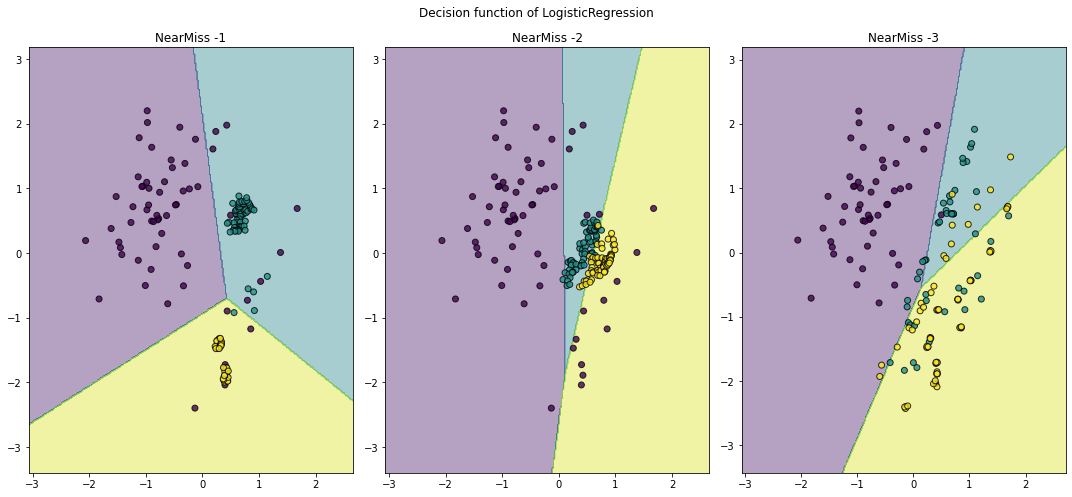

In [214]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
sampler = NearMiss(version=1, n_neighbors=2)
X_res, y_res = sampler.fit_resample(X, y)
clf.fit(X_res, y_res)
plot_decision_function(X_res, y_res, clf, axs[0], title="NearMiss -1")


sampler = NearMiss(version=2, n_neighbors=2)
X_res, y_res = sampler.fit_resample(X, y)
clf.fit(X_res, y_res)
plot_decision_function(X_res, y_res, clf, axs[1], title="NearMiss -2")


sampler = NearMiss(version=3, n_neighbors=2)
X_res, y_res = sampler.fit_resample(X, y)
clf.fit(X_res, y_res)
plot_decision_function(X_res, y_res, clf, axs[2], title="NearMiss -3")

fig.suptitle(f"Decision function of {clf.__class__.__name__}")
fig.tight_layout()

# Over and Under Sampling

In [215]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

pipeline = Pipeline(steps=[('o', over), ('u', under), ('m', model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.948
